# Training SVR model

## Let's import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


## Let's load the datset

In [2]:
df = pd.read_csv("air_quality_cleaned.csv")
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [3]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000
mean,2.085820,1097.966424,9.987668,937.625172,234.514729,833.998839,112.332700,1456.605955,1019.870024,18.317829,49.234201,1.025530
std,1.315415,211.661265,7.270307,260.065263,194.006563,250.307741,43.684741,337.321954,388.476425,8.605371,16.872320,0.393446
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.200000,943.000000,4.600000,744.000000,113.000000,667.000000,86.000000,1246.000000,744.500000,12.100000,36.700000,0.750100
50%,1.800000,1063.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,18.317829,49.234201,1.020300
75%,2.600000,1218.000000,13.500000,1102.000000,281.500000,957.000000,132.000000,1658.000000,1250.000000,24.000000,61.700000,1.291500
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [4]:
df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [5]:
df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

## We are taking sensor values, Environmental columns as Input variables and Ground truth values as Target variables.

In [6]:
X = df[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)','PT08.S4(NO2)', 'PT08.S5(O3)','T', 'RH', 'AH']]

In [7]:
# Our first Target variable

y = df['CO(GT)']

## Let's use test train split to split the dataset into trainig and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state= 19)

## Let's use standardscalar and scale the input features

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Let's train a Linerar SVR model and evaluate the result

In [10]:
svr_linear = SVR(kernel='linear', C=1.0)
svr_linear.fit(X_train_scaled, y_train)
y_pred_linear = svr_linear.predict(X_test_scaled)

In [12]:
#Evaluating the result

mae_lin_co = mean_absolute_error(y_test, y_pred_linear)
rmse_lin_co = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_lin_co = r2_score(y_test, y_pred_linear)

print("Linear SVR Performance")
print(f"MAE  : {mae_lin_co:.3f}")
print(f"RMSE : {rmse_lin_co:.3f}")
print(f"R²   : {r2_lin_co:.3f}")

Linear SVR Performance
MAE  : 0.452
RMSE : 0.752
R²   : 0.680


## SVR non-linear model training

In [13]:
svr_rbf = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svr_rbf.predict(X_test_scaled)

In [15]:
#Let's evaluate result

mae_rbf_co = mean_absolute_error(y_test, y_pred_rbf)
rmse_rbf_co = np.sqrt(mean_squared_error(y_test, y_pred_rbf))
r2_rbf_co = r2_score(y_test, y_pred_rbf)

print("RBF SVR Performance")
print(f"MAE  : {mae_rbf_co:.3f}")
print(f"RMSE : {rmse_rbf_co:.3f}")
print(f"R²   : {r2_rbf_co:.3f}")

RBF SVR Performance
MAE  : 0.391
RMSE : 0.683
R²   : 0.737


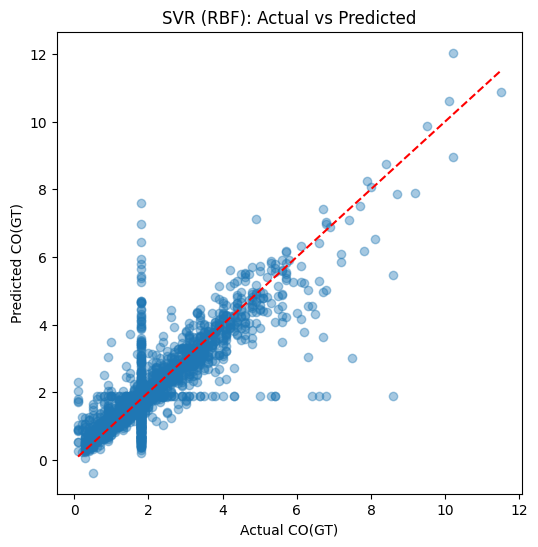

In [16]:
# Let's visualize the result

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rbf, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("SVR (RBF): Actual vs Predicted")
plt.show()


## New Target variable: NOx(GT)

In [17]:
y = df['NOx(GT)']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=19)

In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
# Linear model

svr_linear = SVR(kernel='linear', C=1.0)

svr_linear.fit(X_train_scaled, y_train)
y_pred_linear = svr_linear.predict(X_test_scaled)


In [21]:
mae_lin_nox = mean_absolute_error(y_test, y_pred_linear)
rmse_lin_nox = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_lin_nox = r2_score(y_test, y_pred_linear)

print("Linear SVR – NOx(GT)")
print(f"MAE  : {mae_lin_nox:.3f}")
print(f"RMSE : {rmse_lin_nox:.3f}")
print(f"R²   : {r2_lin_nox:.3f}")

Linear SVR – NOx(GT)
MAE  : 71.426
RMSE : 114.090
R²   : 0.654


In [22]:
#Non-linear model

svr_rbf = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)

svr_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svr_rbf.predict(X_test_scaled)

In [23]:
#Evaluating the results
mae_rbf_nox = mean_absolute_error(y_test, y_pred_rbf)
rmse_rbf_nox = np.sqrt(mean_squared_error(y_test, y_pred_rbf))
r2_rbf_nox = r2_score(y_test, y_pred_rbf)

print("RBF SVR – NOx(GT)")
print(f"MAE  : {mae_rbf_nox:.3f}")
print(f"RMSE : {rmse_rbf_nox:.3f}")
print(f"R²   : {r2_rbf_nox:.3f}")

RBF SVR – NOx(GT)
MAE  : 51.918
RMSE : 88.942
R²   : 0.790


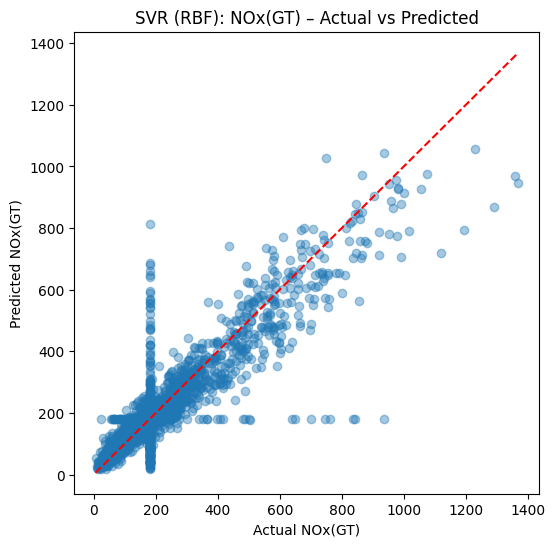

In [24]:
#Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rbf, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual NOx(GT)")
plt.ylabel("Predicted NOx(GT)")
plt.title("SVR (RBF): NOx(GT) – Actual vs Predicted")
plt.show()


## New taget variable
NO2(GT)

In [25]:
y = df['NO2(GT)']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
#Linear model
svr_linear = SVR(kernel='linear', C=1.0)
svr_linear.fit(X_train_scaled, y_train)
y_pred_linear = svr_linear.predict(X_test_scaled)


In [29]:
#Evaluating result

mae_lin_no2 = mean_absolute_error(y_test, y_pred_linear)
rmse_lin_no2 = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_lin_no2 = r2_score(y_test, y_pred_linear)

print("Linear SVR – NO2(GT)")
print(f"MAE  : {mae_lin_no2:.3f}")
print(f"RMSE : {rmse_lin_no2:.3f}")
print(f"R²   : {r2_lin_no2:.3f}")

Linear SVR – NO2(GT)
MAE  : 20.398
RMSE : 27.681
R²   : 0.610


In [30]:
#Non-Linear model

svr_rbf = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svr_rbf.predict(X_test_scaled)

In [31]:
mae_rbf_no2 = mean_absolute_error(y_test, y_pred_rbf)
rmse_rbf_no2 = np.sqrt(mean_squared_error(y_test, y_pred_rbf))
r2_rbf_no2 = r2_score(y_test, y_pred_rbf)

print("RBF SVR – NO2(GT)")
print(f"MAE  : {mae_rbf_no2:.3f}")
print(f"RMSE : {rmse_rbf_no2:.3f}")
print(f"R²   : {r2_rbf_no2:.3f}")

RBF SVR – NO2(GT)
MAE  : 16.298
RMSE : 23.518
R²   : 0.718


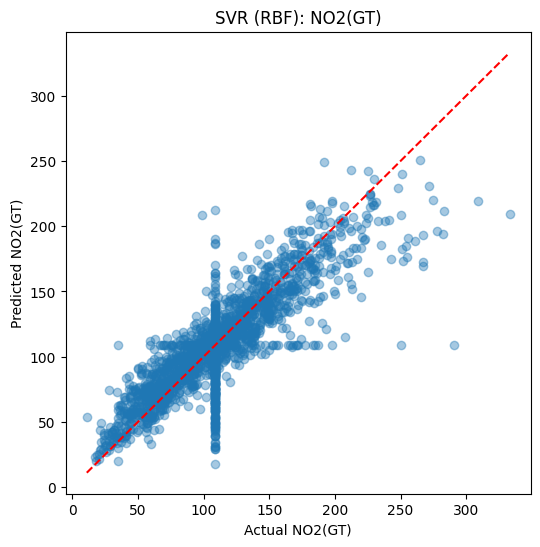

In [32]:
#Actual vs predicted

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rbf, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual NO2(GT)")
plt.ylabel("Predicted NO2(GT)")
plt.title("SVR (RBF): NO2(GT)")
plt.show()


## New Target variable

C6H6(GT)

In [33]:
y = df['C6H6(GT)']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#Linear model
svr_linear = SVR(kernel='linear', C=1.0)
svr_linear.fit(X_train_scaled, y_train)
y_pred_linear = svr_linear.predict(X_test_scaled)

In [37]:
#Evaluation
mae_lin_c6h6 = mean_absolute_error(y_test, y_pred_linear)
rmse_lin_c6h6 = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_lin_c6h6 = r2_score(y_test, y_pred_linear)

print("Linear SVR – C6H6(GT)")
print(f"MAE  : {mae_lin_c6h6:.3f}")
print(f"RMSE : {rmse_lin_c6h6:.3f}")
print(f"R²   : {r2_lin_c6h6:.3f}")

Linear SVR – C6H6(GT)
MAE  : 0.806
RMSE : 1.404
R²   : 0.964


In [38]:
#Non-linear model

svr_rbf = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svr_rbf.predict(X_test_scaled)

In [39]:
mae_rbf_c6h6 = mean_absolute_error(y_test, y_pred_rbf)
rmse_rbf_c6h6 = np.sqrt(mean_squared_error(y_test, y_pred_rbf))
r2_rbf_c6h6 = r2_score(y_test, y_pred_rbf)

print("RBF SVR – C6H6(GT)")
print(f"MAE  : {mae_rbf_c6h6:.3f}")
print(f"RMSE : {rmse_rbf_c6h6:.3f}")
print(f"R²   : {r2_rbf_c6h6:.3f}")


RBF SVR – C6H6(GT)
MAE  : 0.050
RMSE : 0.116
R²   : 1.000


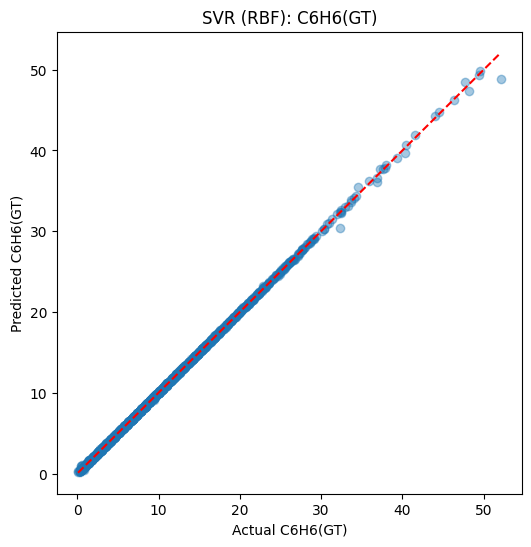

In [40]:
#Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rbf, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual C6H6(GT)")
plt.ylabel("Predicted C6H6(GT)")
plt.title("SVR (RBF): C6H6(GT)")
plt.show()

In [41]:
results = [
    
    # CO(GT)
    {
        "Target": "CO(GT)",
        "Model": "Linear SVR",
        "MAE": mae_lin_co,
        "RMSE": rmse_lin_co,
        "R2": r2_lin_co
    },
    {
        "Target": "CO(GT)",
        "Model": "RBF SVR",
        "MAE": mae_rbf_co,
        "RMSE": rmse_rbf_co,
        "R2": r2_rbf_co
    },

    # NOx(GT)
    {
        "Target": "NOx(GT)",
        "Model": "Linear SVR",
        "MAE": mae_lin_nox,
        "RMSE": rmse_lin_nox,
        "R2": r2_lin_nox
    },
    {
        "Target": "NOx(GT)",
        "Model": "RBF SVR",
        "MAE": mae_rbf_nox,
        "RMSE": rmse_rbf_nox,
        "R2": r2_rbf_nox
    },

    # NO2(GT)
    {
        "Target": "NO2(GT)",
        "Model": "Linear SVR",
        "MAE": mae_lin_no2,
        "RMSE": rmse_lin_no2,
        "R2": r2_lin_no2
    },
    {
        "Target": "NO2(GT)",
        "Model": "RBF SVR",
        "MAE": mae_rbf_no2,
        "RMSE": rmse_rbf_no2,
        "R2": r2_rbf_no2
    },

    # C6H6(GT)
    {
        "Target": "C6H6(GT)",
        "Model": "Linear SVR",
        "MAE": mae_lin_c6h6,
        "RMSE": rmse_lin_c6h6,
        "R2": r2_lin_c6h6
    },
    {
        "Target": "C6H6(GT)",
        "Model": "RBF SVR",
        "MAE": mae_rbf_c6h6,
        "RMSE": rmse_rbf_c6h6,
        "R2": r2_rbf_c6h6
    }
]

results_df = pd.DataFrame(results)

print(results_df)


     Target       Model        MAE        RMSE        R2
0    CO(GT)  Linear SVR   0.451716    0.751934  0.680271
1    CO(GT)     RBF SVR   0.390902    0.682580  0.736531
2   NOx(GT)  Linear SVR  71.425893  114.090379  0.654247
3   NOx(GT)     RBF SVR  51.918043   88.942232  0.789872
4   NO2(GT)  Linear SVR  20.398265   27.681287  0.609915
5   NO2(GT)     RBF SVR  16.297931   23.517933  0.718431
6  C6H6(GT)  Linear SVR   0.806353    1.404246  0.964483
7  C6H6(GT)     RBF SVR   0.050405    0.115914  0.999758


In [42]:
pivot_df = results_df.pivot(
    index="Target",
    columns="Model",
    values=["MAE","RMSE","R2"]
)

pivot_df


MAE                   RMSE                    R2          
Model    Linear SVR    RBF SVR  Linear SVR    RBF SVR Linear SVR   RBF SVR
Target                                                                    
C6H6(GT)   0.806353   0.050405    1.404246   0.115914   0.964483  0.999758
CO(GT)     0.451716   0.390902    0.751934   0.682580   0.680271  0.736531
NO2(GT)   20.398265  16.297931   27.681287  23.517933   0.609915  0.718431
NOx(GT)   71.425893  51.918043  114.090379  88.942232   0.654247  0.789872

## Hyperparameter Tuning

In [43]:
#Let's tune Parameter for NOx variable
y = df['NOx(GT)']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [51]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
#Base line model

baseline_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
baseline_model.fit(X_train_scaled, y_train)

SVR(C=100)

In [53]:
baseline_preds = baseline_model.predict(X_test_scaled)

In [54]:
baseline_mae = mean_absolute_error(y_test, baseline_preds)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))
baseline_r2 = r2_score(y_test, baseline_preds)

In [55]:
print("Baseline RBF SVR – NOx(GT)")
print(f"MAE  : {baseline_mae:.3f}")
print(f"RMSE : {baseline_rmse:.3f}")
print(f"R²   : {baseline_r2:.3f}")

Baseline RBF SVR – NOx(GT)
MAE  : 51.918
RMSE : 88.942
R²   : 0.790


In [56]:
param_grid = {
    'C': [10, 50, 100, 300],
    'gamma': ['scale', 0.01, 0.05, 0.1],
    'epsilon': [0.1, 0.5, 1.0]}

In [57]:
from sklearn.model_selection import GridSearchCV

svr = SVR(kernel='rbf')

grid_search = GridSearchCV(
    svr,
    param_grid,
    scoring='neg_root_mean_squared_error',  # RMSE-focused
    cv=5,
    n_jobs=-1)

In [58]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [10, 50, 100, 300], 'epsilon': [0.1, 0.5, 1.0],
                         'gamma': ['scale', 0.01, 0.05, 0.1]},
             scoring='neg_root_mean_squared_error')

In [59]:
print("Best Parameters:")
print(grid_search.best_params_)


Best Parameters:
{'C': 300, 'epsilon': 1.0, 'gamma': 'scale'}


In [60]:
best_model = grid_search.best_estimator_

tuned_preds = best_model.predict(X_test_scaled)

tuned_mae = mean_absolute_error(y_test, tuned_preds)
tuned_rmse = np.sqrt(mean_squared_error(y_test, tuned_preds))
tuned_r2 = r2_score(y_test, tuned_preds)

print("Tuned RBF SVR – NOx(GT)")
print(f"MAE  : {tuned_mae:.3f}")
print(f"RMSE : {tuned_rmse:.3f}")
print(f"R²   : {tuned_r2:.3f}")

Tuned RBF SVR – NOx(GT)
MAE  : 50.577
RMSE : 87.554
R²   : 0.796


In [61]:
comparison = pd.DataFrame({
    "Model": ["Baseline RBF SVR", "Tuned RBF SVR"],
    "MAE": [baseline_mae, tuned_mae],
    "RMSE": [baseline_rmse, tuned_rmse],
    "R2": [baseline_r2, tuned_r2]
})

print(comparison)

              Model        MAE       RMSE        R2
0  Baseline RBF SVR  51.918043  88.942232  0.789872
1     Tuned RBF SVR  50.577458  87.554082  0.796380
